## Part 1: emotional maps 

In [38]:
import geopandas as gpd
from matplotlib import pyplot as plt
import pandas as pd
import hvplot.pandas
import pysal
from collections import defaultdict
import matplotlib.pyplot as plt
from matplotlib.pylab import cm
from pysal.explore.esda.getisord import G_Local
from pysal.explore.esda.moran import Moran
from pysal.lib.weights import KNN
import tqdm
import random
import mapclassify
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
#plt.rc('text', usetex=True)

In [39]:
US=gpd.read_file('States_shapefile-shp.zip')
senti_data=pd.read_csv('.\data\senti_data.csv',encoding='utf-8')

In [40]:
#Here is the data set for creating the the emotional map
emo=senti_data.groupby(['location'])['anger','trust','surprise','positive','negative','sadness','disgust','joy','anticipation'].sum().reset_index()

C:\Users\zheng\AppData\Local\Temp/ipykernel_31452/96854937.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  emo=senti_data.groupby(['location'])['anger','trust','surprise','positive','negative','sadness','disgust','joy','anticipation'].sum().reset_index()


In [41]:
import regex as re
#here is the dataset for creating the sentiment map
senti_group=senti_data.groupby("location")['anger','trust','surprise','positive','negative','sadness','disgust','joy','anticipation'].sum().reset_index()
senti_group['location_normalized'] = senti_group['location'].str.replace("\W*USA", "", regex=True)

senti_group2=senti_group.groupby("location_normalized")['anger','trust','surprise','positive','negative','sadness','disgust','joy','anticipation'].sum().reset_index()

df_filtered = senti_data[(senti_data.month!= 12)]
df_filtered['location_normalized'] = df_filtered['location'].str.replace("\W*USA", "", regex=True)
df_filtered2=df_filtered.groupby("location_normalized")['anger','trust','surprise','positive','negative','sadness','disgust','joy','anticipation'].sum().reset_index()
df_filtered2.drop(df_filtered2.head(2).index,inplace=True)

df_filtered2['location_normalized']=df_filtered2['location_normalized'].apply(lambda x: x.upper())
merged = df_filtered2.merge(US, how='left', left_on='location_normalized', right_on='State_Name')
merged_emo=merged[merged['FID'].notna()]
merged_emo.head()

C:\Users\zheng\AppData\Local\Temp/ipykernel_31452/1324326300.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  senti_group=senti_data.groupby("location")['anger','trust','surprise','positive','negative','sadness','disgust','joy','anticipation'].sum().reset_index()
C:\Users\zheng\AppData\Local\Temp/ipykernel_31452/1324326300.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  senti_group2=senti_group.groupby("location_normalized")['anger','trust','surprise','positive','negative','sadness','disgust','joy','anticipation'].sum().reset_index()
C:\Users\zheng\AppData\Local\Temp/ipykernel_31452/1324326300.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

,location_normalized,anger,trust,surprise,positive,negative,sadness,disgust,joy,anticipation,FID,Program,State_Code,State_Name,Flowing_St,FID_1,geometry
0,ALABAMA,2.156324,3.519816,0.617100,9.219156,4.554951,2.590726,1.010689,2.099206,1.300805,1.0,PERMIT TRACKING,AL,ALABAMA,F,919.0,"POLYGON ((-85.07007 31.98070, -85.11515 31.907..."
1,ALASKA,0.000000,0.166667,0.166667,3.166667,0.000000,0.000000,0.000000,0.166667,1.333333,2.0,None,AK,ALASKA,N,920.0,"MULTIPOLYGON (((-161.33379 58.73325, -161.3824..."
3,ARIZONA,1.545824,2.788539,1.814200,13.530614,3.595377,2.460120,0.469755,1.037277,3.626166,3.0,AZURITE,AZ,ARIZONA,F,921.0,"POLYGON ((-114.52063 33.02771, -114.55909 33.0..."
4,ARKANSAS,0.402320,2.720452,1.220635,15.965690,0.826465,0.763431,0.380952,2.337302,3.014621,4.0,PDS,AR,ARKANSAS,F,922.0,"POLYGON ((-94.46169 34.19677, -94.45262 34.508..."
7,CALIFORNIA,4.490706,5.800610,3.427579,25.128275,11.264393,4.715310,1.595285,4.979149,7.002489,5.0,None,CA,CALIFORNIA,N,923.0,"MULTIPOLYGON (((-121.66522 38.16929, -121.7823..."


In [42]:
merged_emo = gpd.GeoDataFrame(merged_emo, geometry="geometry", crs="EPSG:4326")
#delete Alaska and Hawaii since we only need to focus on the continent of USA
merged_emo=merged_emo[(merged_emo['location_normalized'] != 'ALASKA') 
                          & (merged_emo['location_normalized'] != 'HAWAII')]

1. plot different emotional maps

<AxesSubplot:title={'center':'anger'}>

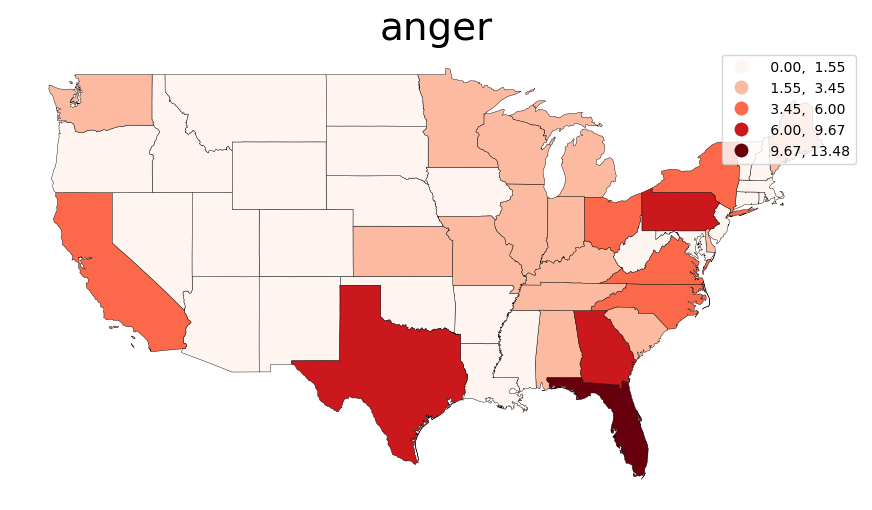

In [51]:
#anger
fig, ax = plt.subplots(1, figsize=(11,8.5))
ax.axis('off')
ax.set_title('anger', fontsize=28)
merged_emo.plot(ax=ax, column="anger", scheme='naturalbreaks', legend=True, cmap = plt.get_cmap('Reds'),linewidth=0.3, edgecolor='black')

<AxesSubplot:title={'center':'surprise'}>

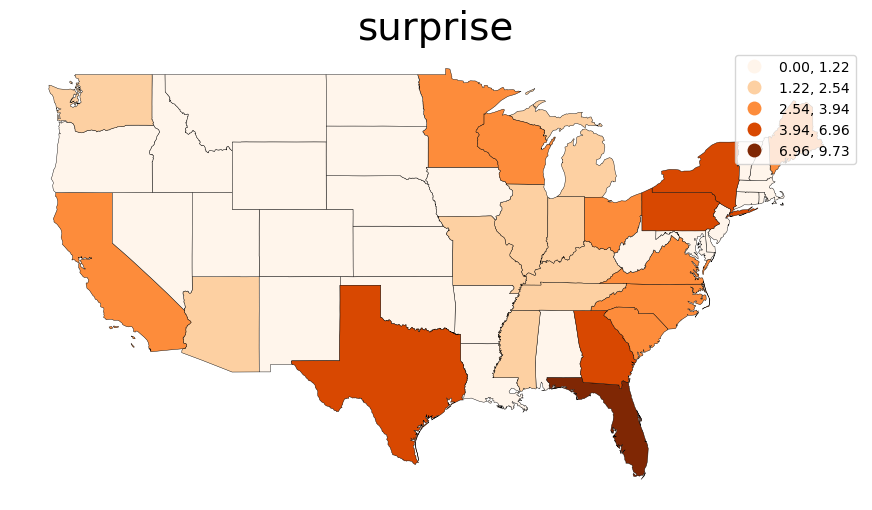

In [53]:
#surprise
fig, ax = plt.subplots(1, figsize=(11,8.5))
ax.axis('off')
ax.set_title('surprise', fontsize=28)
merged_emo.plot(ax=ax, column="surprise", scheme='naturalbreaks', legend=True, cmap = plt.get_cmap('Oranges'),linewidth=0.3, edgecolor='black')

<AxesSubplot:title={'center':'joy'}>

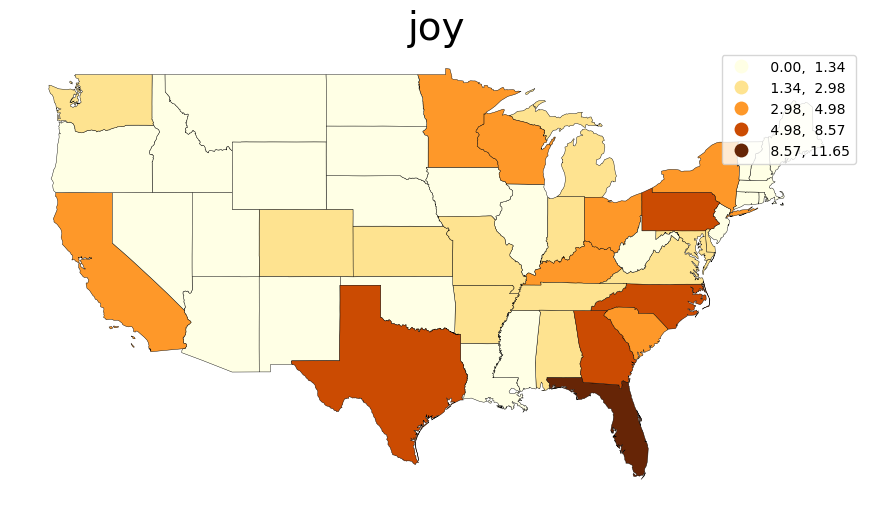

In [58]:
#joy
fig, ax = plt.subplots(1, figsize=(11,8.5))
ax.axis('off')
ax.set_title('joy', fontsize=28)
merged_emo.plot(ax=ax, column="joy", scheme='naturalbreaks', legend=True, cmap = plt.get_cmap('YlOrBr'),linewidth=0.3, edgecolor='black')

<AxesSubplot:title={'center':'trust'}>

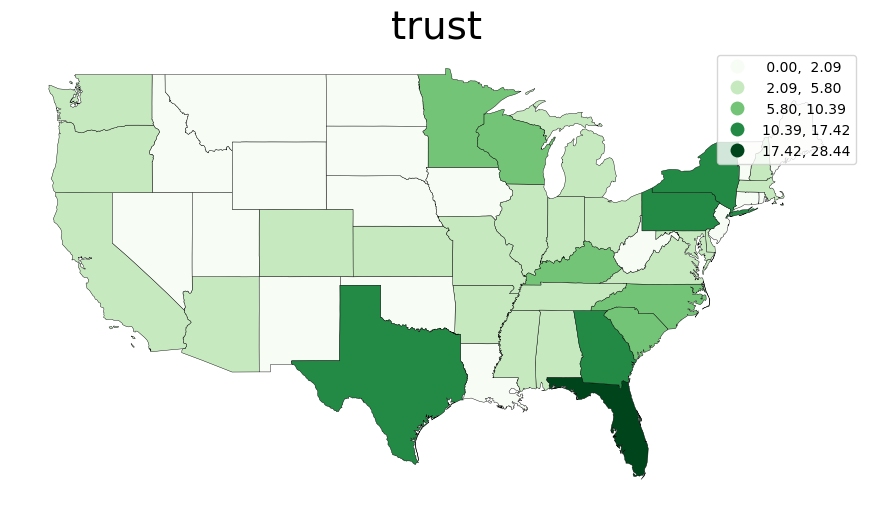

In [54]:
#trust
fig, ax = plt.subplots(1, figsize=(11,8.5))
ax.axis('off')
ax.set_title('trust', fontsize=28)
merged_emo.plot(ax=ax, column="trust", scheme='naturalbreaks', legend=True, cmap = plt.get_cmap('Greens'),linewidth=0.3, edgecolor='black')

<AxesSubplot:title={'center':'sadness'}>

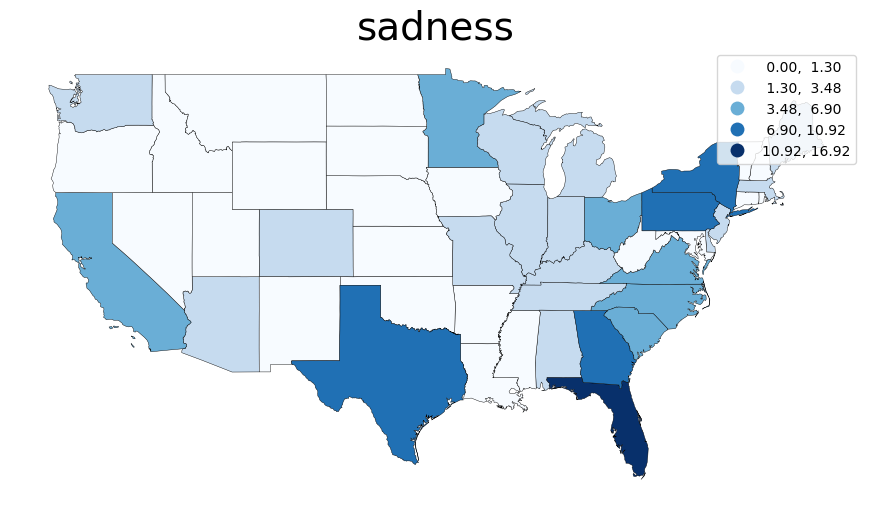

In [55]:
#sadness
fig, ax = plt.subplots(1, figsize=(11,8.5))
ax.axis('off')
ax.set_title('sadness', fontsize=28)
merged_emo.plot(ax=ax, column="sadness", scheme='naturalbreaks', legend=True, cmap = plt.get_cmap('Blues'),linewidth=0.3, edgecolor='black')

<AxesSubplot:title={'center':'disgust'}>

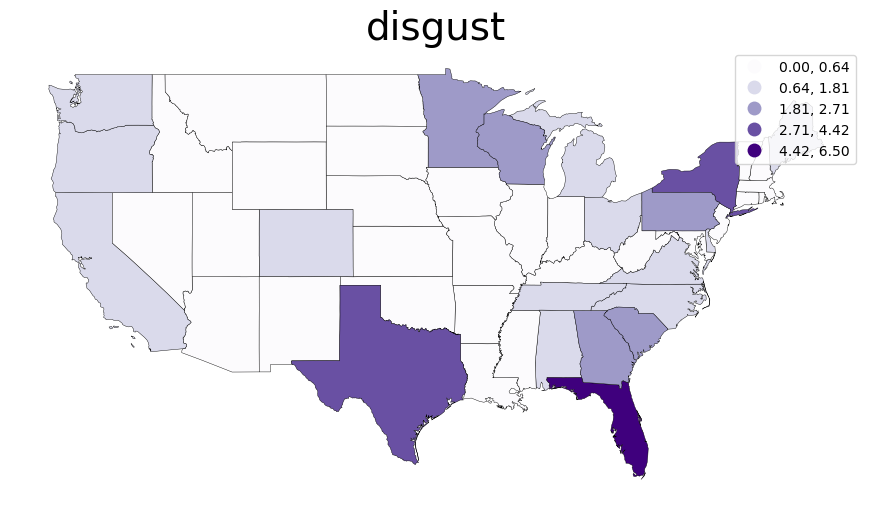

In [68]:
#disgust
fig, ax = plt.subplots(1, figsize=(11,8.5))
ax.axis('off')
ax.set_title('disgust', fontsize=28)
merged_emo.plot(ax=ax, column="disgust", scheme='naturalbreaks', legend=True, cmap = plt.get_cmap('Purples'),linewidth=0.3, edgecolor='black')

## Part 2: Spatial autocorrelation of positive and negative emotions

2. create nearest neighbourhoods

C:\Users\zheng\AppData\Local\Temp/ipykernel_31452/4197147950.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  us_centroid.geometry = merged_emo.centroid


<AxesSubplot:>

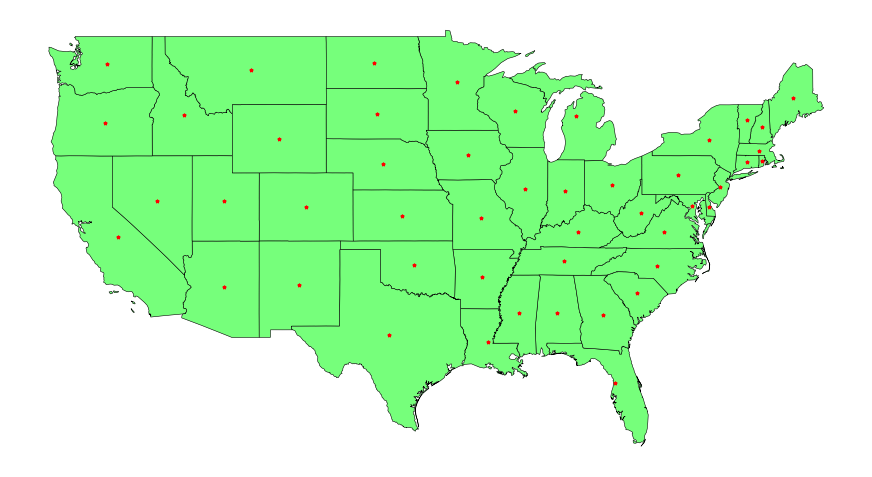

In [59]:
us_centroid = merged_emo[['geometry']].copy()
us_centroid.geometry = merged_emo.centroid
fig, ax = plt.subplots(1, figsize=(11,8.5))
ax.axis('off')

merged_emo.plot(ax=ax, facecolor="#76FF7B", linewidth=0.4, edgecolor='0')
us_centroid.plot(ax=ax, marker='*', color='red', markersize=5)

2. Build the Spatial Weights Matrix

Here I choose N=5

In [60]:
swm5 = KNN.from_dataframe(merged_emo, k=5)

3. Calculate the Global Moran's I 

In [61]:
pos_mi = Moran(merged_emo.positive, swm5)
print("Global Moran's I for positive tweets:", pos_mi.I) 
print("Global Moran's p-value: %0.19f" % pos_mi.p_norm) 

Global Moran's I for positive tweets: 0.20532576507819358
Global Moran's p-value: 0.0050474715951336346


In [62]:
neg_mi = Moran(merged_emo.negative, swm5)
print("Global Moran's I for negative tweets:", neg_mi.I) 
print("Global Moran's p-value: %0.19f" % neg_mi.p_norm) 

Global Moran's I for negative tweets: 0.1751399589405492
Global Moran's p-value: 0.0150793448129815655


4. Plot map of local Moran's I

In [63]:
gol = pysal.explore.esda.G_Local(merged_emo['positive'], swm5, transform='B')
merged_emo['positive_I'] = gol.Zs
cols = ["positive_I", "State_Name", "positive", "geometry"]
pos_moran=merged_emo.hvplot(c="positive_I", 
                    width=600,
                  height=350,
                    cmap='cet_CET_D9',
                    hover_cols=["positive","State_Name"])
#hvplot.save(pos_moran, 'pos_moran.html')
from IPython.display import HTML
HTML('pos_moran.html')

In [64]:
gol = pysal.explore.esda.G_Local(merged_emo['negative'], swm5, transform='B')
merged_emo['negative_I'] = gol.Zs
import hvplot.pandas
cols = ["negative_I", "State_Name", "negative", "geometry"]

neg_moran=merged_emo.hvplot(c="negative_I", 
                    width=600,
                  height=350,
                    cmap='cet_CET_D9',
                    hover_cols=["negative","State_Name"])
#hvplot.save(neg_moran, 'neg_moran.html')
from IPython.display import HTML
HTML('neg_moran.html')